<h1>Predicting Employee Turnover at Salifort Motors: Data Analysis and Insights</h1>

<h1>Loading the Data and Initial Exploration</h1>

In [3]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Loading dataset into a dataframe
df = pd.read_csv('HR_capstone_dataset.csv')


In [7]:
# Displaying basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [9]:
# Displaying the first few rows of the dataset
print("\nFirst few rows of the Dataset:")
print(df.head())



First few rows of the Dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   sal

In [11]:
# Gathering descriptive statistics about the data
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
        satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN        

<h1>Data Cleaning</h1>


In [14]:
# Renaming columns to have consistent snake_case naming
df.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'number_of_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promotion_last_5_years',
    'Department': 'department',
    'salary': 'salary_level'
}, inplace=True)

In [16]:
# Checking for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_monthly_hours     0
years_at_company          0
work_accident             0
left_company              0
promotion_last_5_years    0
department                0
salary_level              0
dtype: int64


In [18]:
# Checking for duplicates
print("\nNumber of Duplicate Rows in the Dataset:")
duplicates = df.duplicated().sum()
print(duplicates)


Number of Duplicate Rows in the Dataset:
3008


In [20]:
# Dropping duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("\nDuplicates dropped.")


Duplicates dropped.


In [22]:
# Displaying first few rows after cleaning
print("\nFirst few rows of the Dataset after cleaning:")
print(df.head())


First few rows of the Dataset after cleaning:
   satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   

   promotion_last_5_years department salary_level  
0                       0      sales          low  
1                       0

<h1>Exploratory Data Analysis (EDA)</h1>


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1              

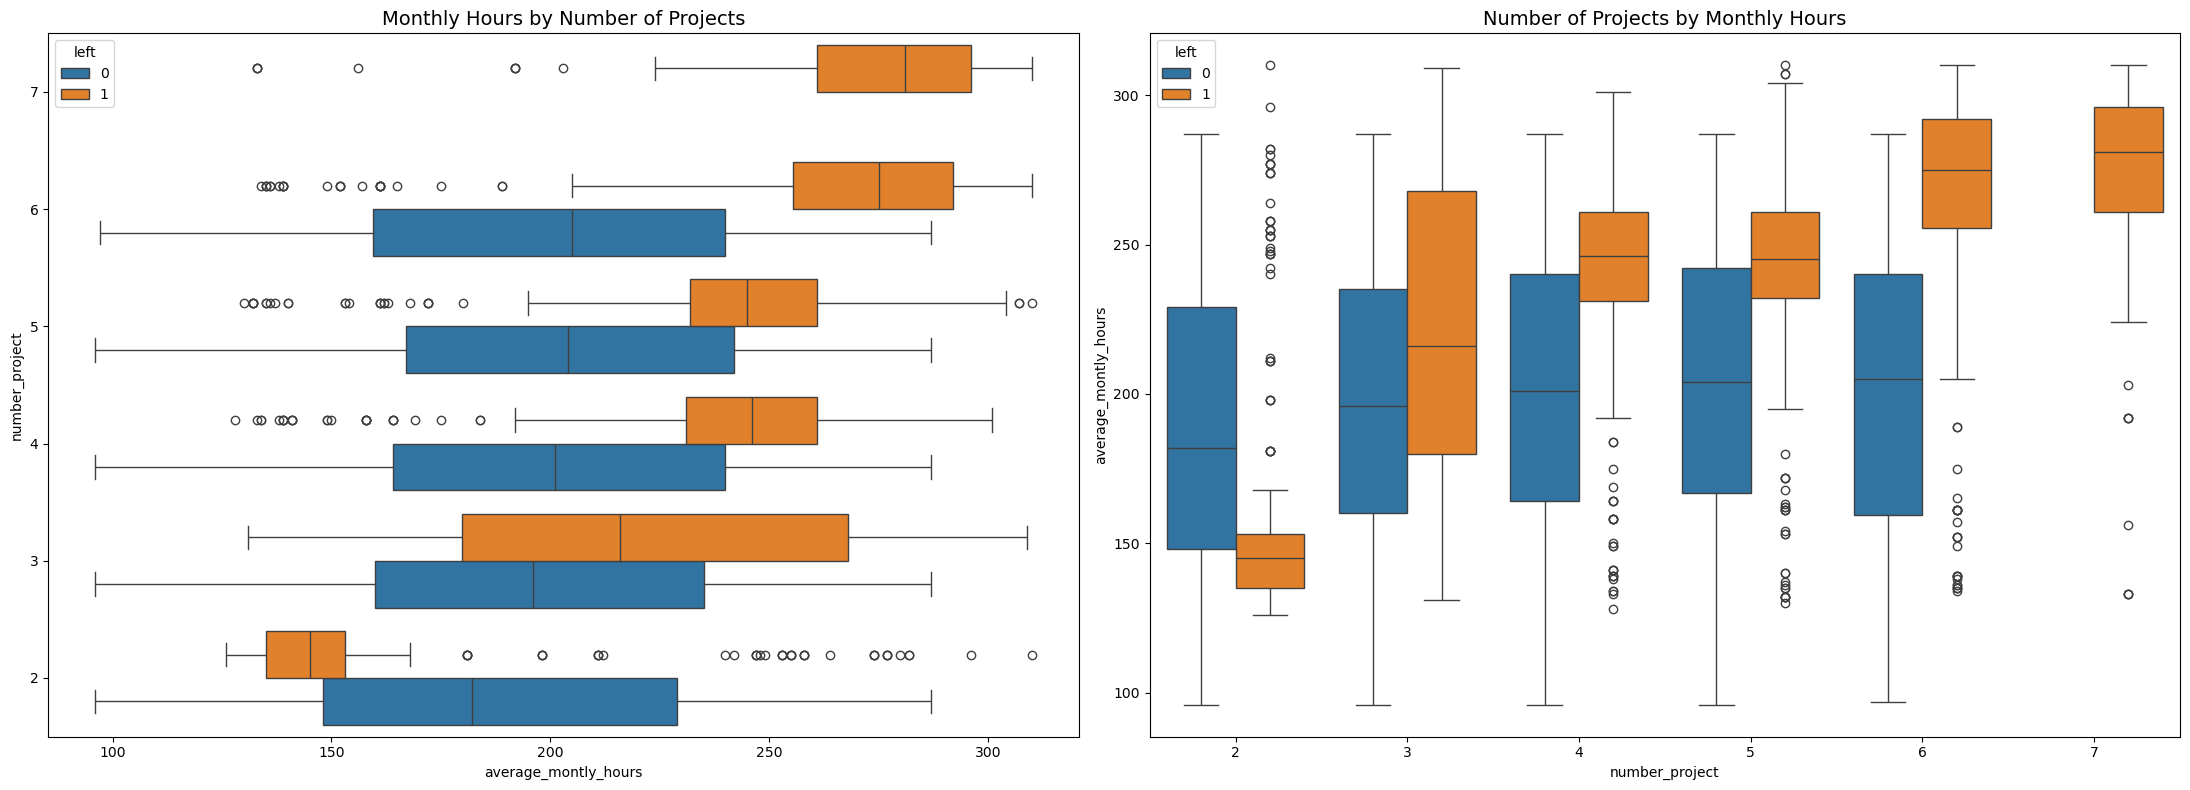

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1 = pd.read_csv('HR_capstone_dataset.csv')


print(df1.columns)
print(df1.head())

# Creating boxplot showing `average_montly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot for `number_project` vs `average_montly_hours`
sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)

# Boxplot for `average_montly_hours` by `number_project`
sns.boxplot(data=df1, x='number_project', y='average_montly_hours', hue='left', ax=ax[1])
ax[1].set_title('Number of Projects by Monthly Hours', fontsize=14)

plt.tight_layout()
plt.show()


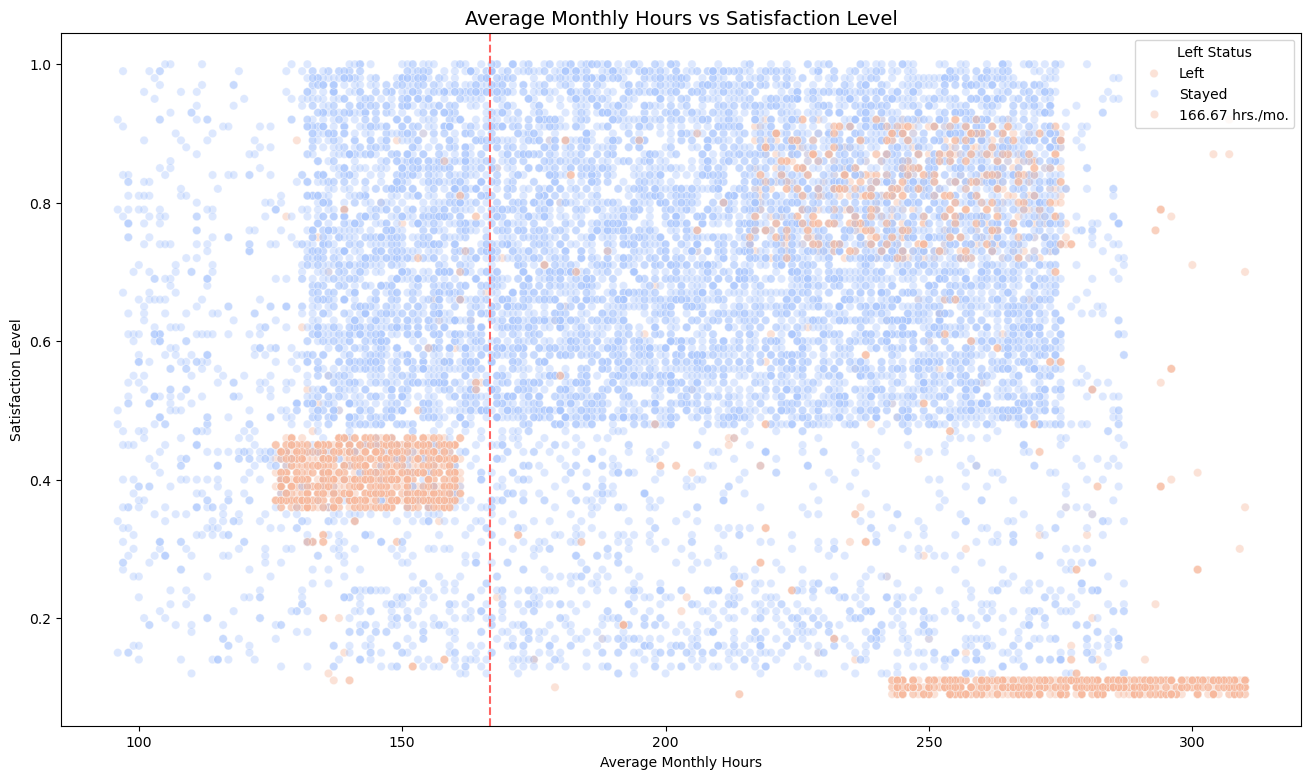

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4, palette='coolwarm')

# Adding vertical line at 166.67 hours
plt.axvline(x=166.67, color='#ff6361', linestyle='--', label='166.67 hrs./mo.')

# Updating legend to properly reflect the hue variable
plt.legend(title='Left Status', labels=['Left', 'Stayed', '166.67 hrs./mo.'])

# Setting plot titles and labels
plt.title('Average Monthly Hours vs Satisfaction Level', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

# Displaying plot
plt.show()


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


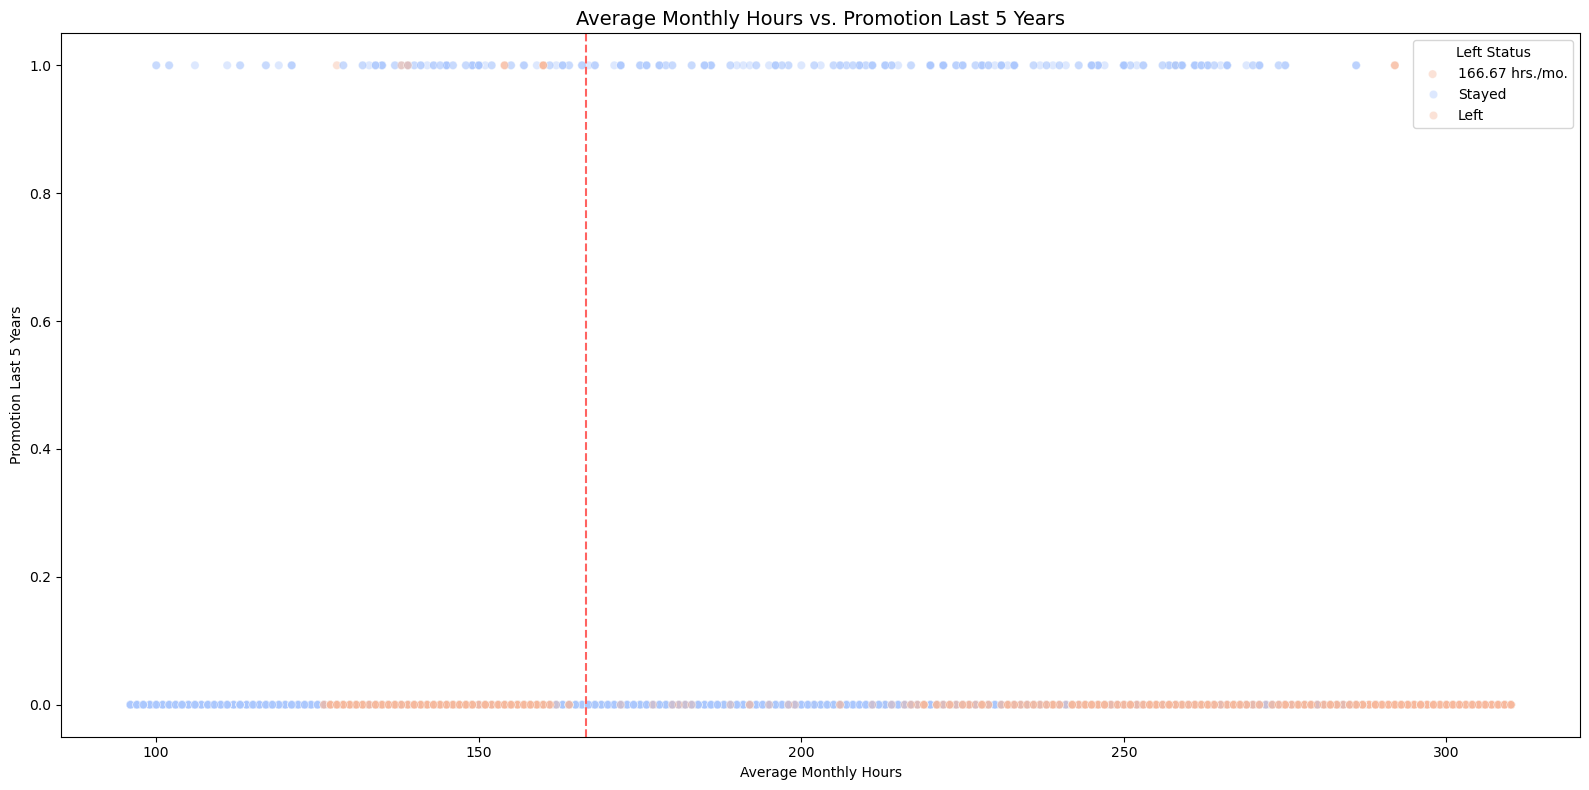

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verifying column names
print(df1.columns)

# Creating scatterplot
plt.figure(figsize=(16, 8))  # Adjusted figure size for better readability

# Replaceing 'average_monthly_hours' with the correct column name if different
sns.scatterplot(data=df1, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.4, palette='coolwarm')

# Adding vertical line at x = 166.67
plt.axvline(x=166.67, color='#ff6361', ls='--', label='166.67 hrs./mo.')

# Customizing legend
plt.legend(title='Left Status', labels=['166.67 hrs./mo.', 'Stayed', 'Left'], loc='upper right')

# Setting title and labels
plt.title('Average Monthly Hours vs. Promotion Last 5 Years', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion Last 5 Years')

# Show plot
plt.tight_layout()
plt.show()


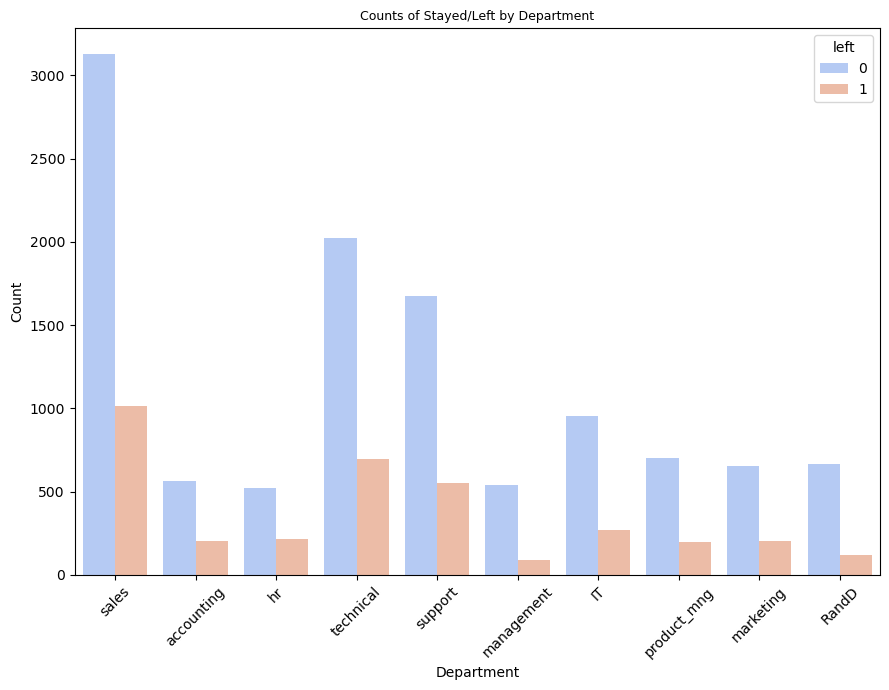

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating countplot to compare department distribution of employees who left and who didn't
plt.figure(figsize=(9, 7))

# Creating the countplot
sns.countplot(data=df1, x='Department', hue='left', palette='coolwarm')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Setting title and labels
plt.title('Counts of Stayed/Left by Department', fontsize=9)
plt.xlabel('Department')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


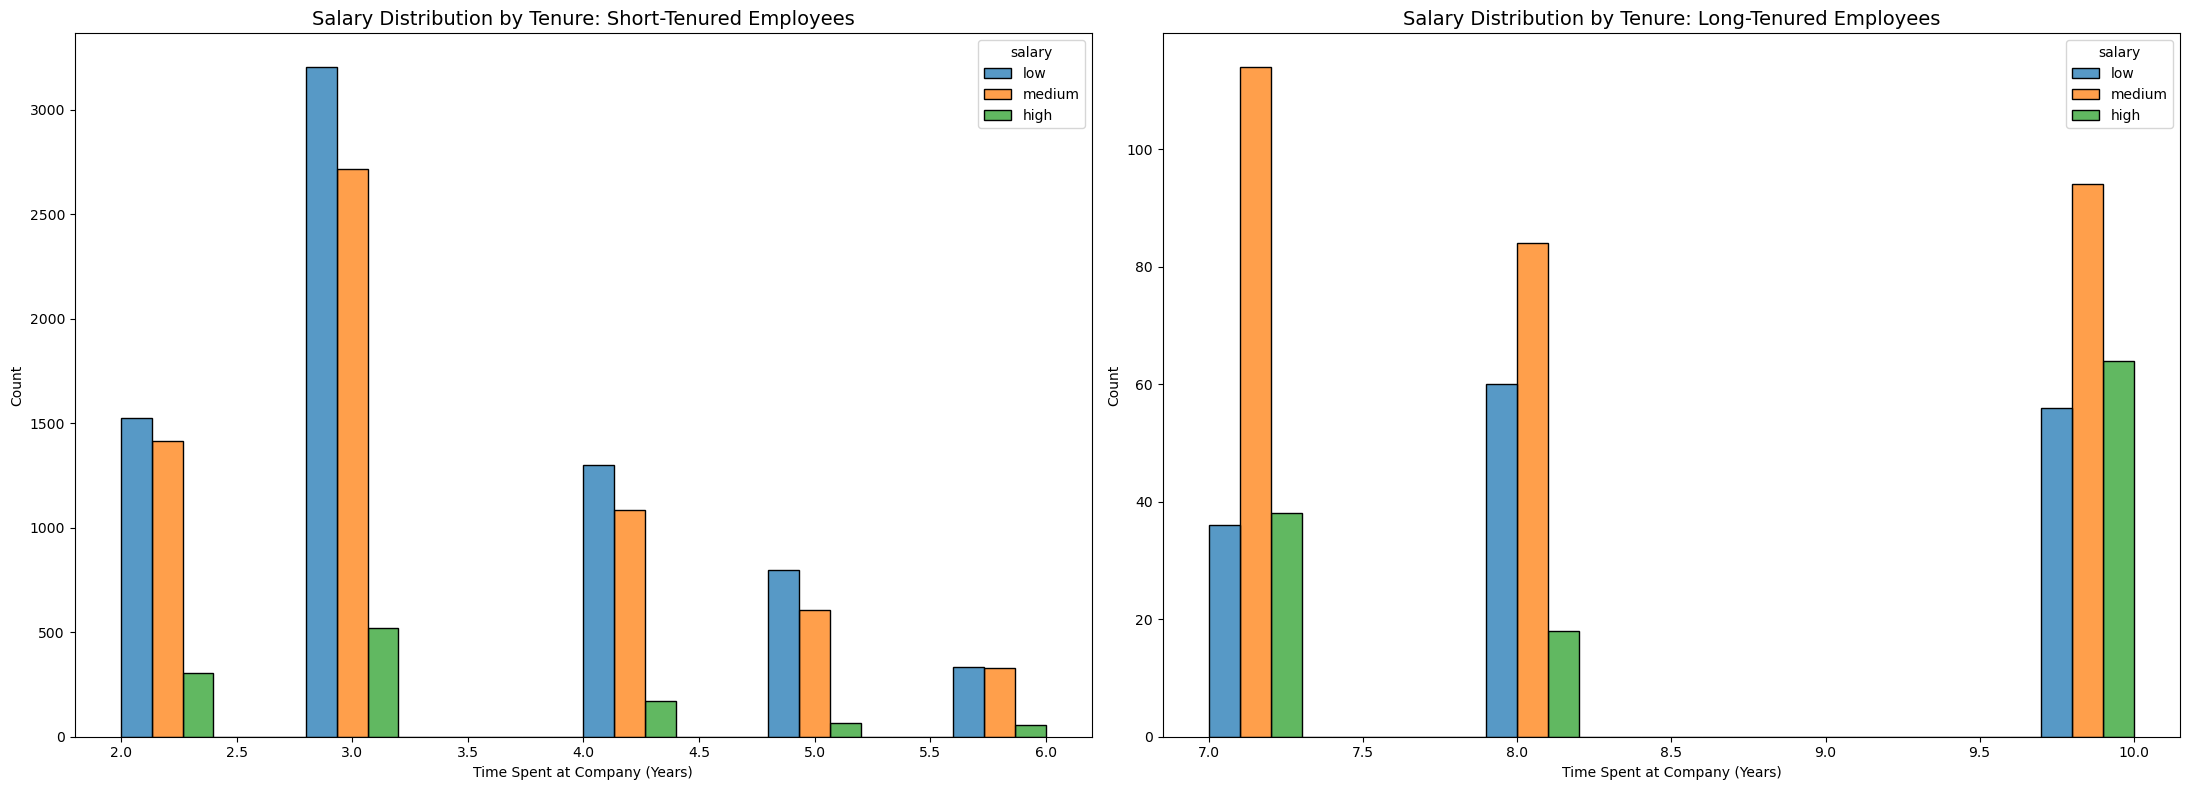

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Defining short-tenured employees
tenure_short = df1[df1['time_spend_company'] < 7]

# Defining long-tenured employees
tenure_long = df1[df1['time_spend_company'] > 6]

# Plotting short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', 
             hue_order=['low', 'medium', 'high'], multiple='dodge', bins=10, ax=ax[0])
ax[0].set_title('Salary Distribution by Tenure: Short-Tenured Employees', fontsize=14)
ax[0].set_xlabel('Time Spent at Company (Years)')
ax[0].set_ylabel('Count')

# Plotting long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', 
             hue_order=['low', 'medium', 'high'], multiple='dodge', bins=10, ax=ax[1])
ax[1].set_title('Salary Distribution by Tenure: Long-Tenured Employees', fontsize=14)
ax[1].set_xlabel('Time Spent at Company (Years)')
ax[1].set_ylabel('Count')

# Adjusting layout and display the plot
plt.tight_layout()
plt.show()


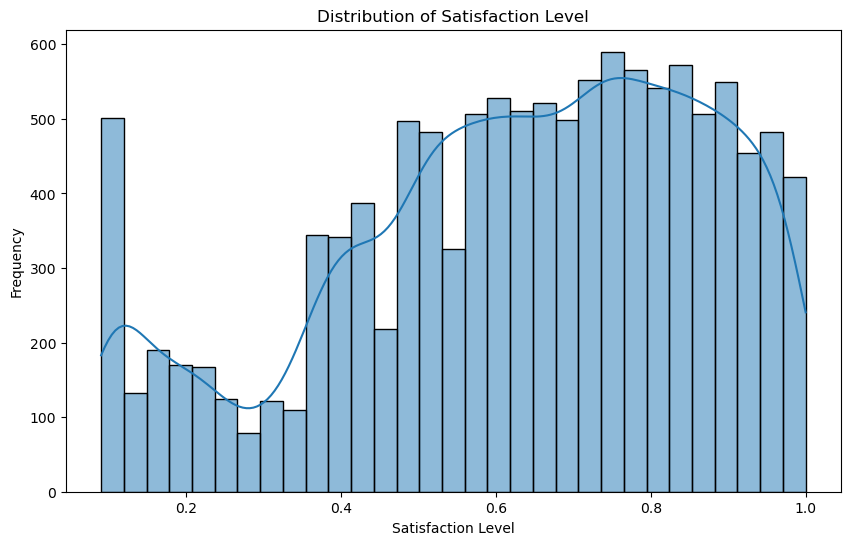

In [23]:
# Plotting distribution of satisfaction level
plt.figure(figsize=(10, 6))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

satisfaction_level        float64
last_evaluation           float64
number_of_projects          int64
average_monthly_hours       int64
years_at_company            int64
work_accident               int64
left_company                int64
promotion_last_5_years      int64
department                 object
salary_level               object
dtype: object


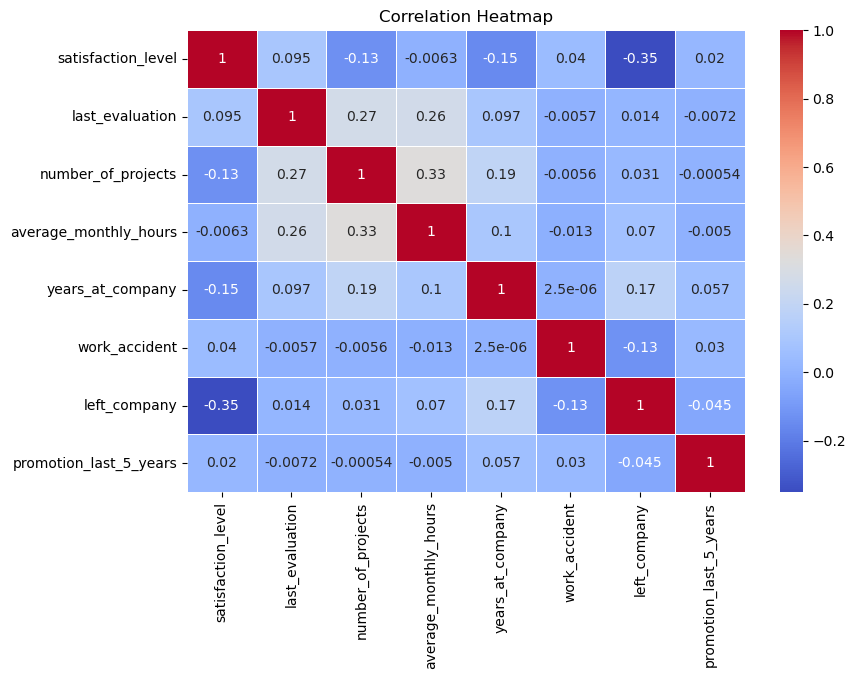

In [37]:
# Plotting correlation heatmap
print(df.dtypes)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(9, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

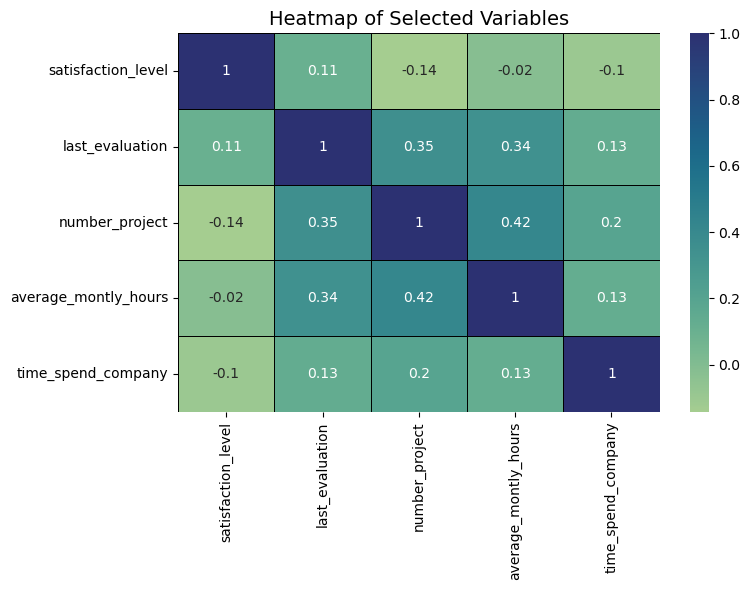

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('HR_capstone_dataset.csv')

# Listing of columns to include in the heatmap
columns_to_plot = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Checking if the DataFrame contains the required columns
missing_columns = [col for col in columns_to_plot if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing columns in DataFrame: {', '.join(missing_columns)}")

# Creating a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[columns_to_plot].corr(), annot=True, cmap="crest", linewidths=0.5, linecolor='black')

# Adding a title
plt.title('Heatmap of Selected Variables', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


<Figure size 1000x600 with 0 Axes>

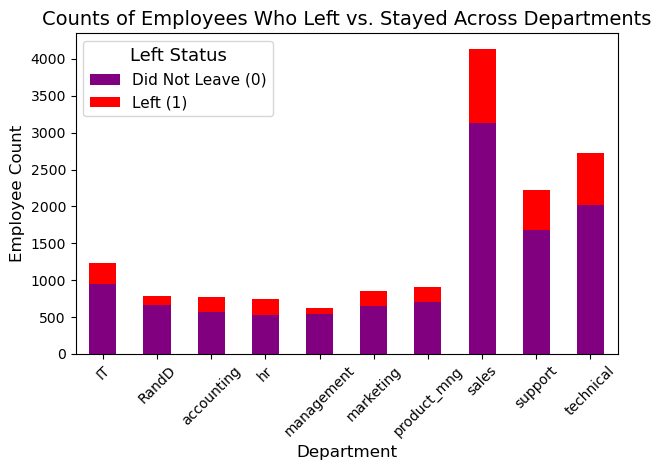

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a crosstab to count the number of employees by department and whether they left
crosstab = pd.crosstab(df1['Department'], df1['left'])

# Plotting
plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, color=['purple', 'red'])

# Adding titles and labels
plt.title('Counts of Employees Who Left vs. Stayed Across Departments', fontsize=14)
plt.ylabel('Employee Count', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.legend(['Did Not Leave (0)', 'Left (1)'], title='Left Status', title_fontsize='13', fontsize='11')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()


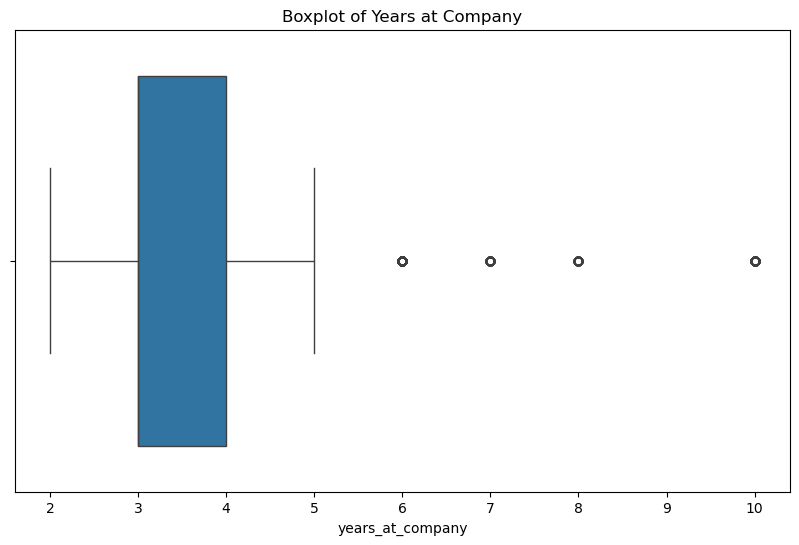

In [29]:
# Plotting boxplot to check for outliers in `years_at_company`
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['years_at_company'])
plt.title('Boxplot of Years at Company')
plt.show()

<h1Feature Engineeringh1>

<h1>Feature Engineering</h1>


In [32]:
# Defining feature columns and target column
features = ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company', 'work_accident', 'promotion_last_5_years', 'department', 'salary_level']
target = 'left_company'

In [34]:
# Converting categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['department', 'salary_level'], drop_first=True)

In [38]:
# Splitting the data into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train[['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company']] = scaler.fit_transform(X_train[['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company']])
X_test[['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company']] = scaler.transform(X_test[['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company']])

<h1>Model Building and Evaluation</h1>

In [42]:
# Building logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Making predictions
y_pred = log_reg.predict(X_test)

In [48]:
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Model Accuracy: 0.831017231795442

Confusion Matrix:
[[2876  119]
 [ 489  114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2995
           1       0.49      0.19      0.27       603

    accuracy                           0.83      3598
   macro avg       0.67      0.57      0.59      3598
weighted avg       0.79      0.83      0.80      3598



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HR_capstone_dataset.csv')

# Select key columns to display
key_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 
               'average_montly_hours', 'time_spend_company', 'Work_accident', 
               'left', 'promotion_last_5years', 'Department', 'salary']

# Display the first 10 rows of key columns
print(df[key_columns].head(10))


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0   

C:\Users\JalalKhan\AppData\Local\Temp\ipykernel_976\2528379170.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='years_at_company', y='promotion_last_5_years', hue='left_label', ci=None, palette='coolwarm')


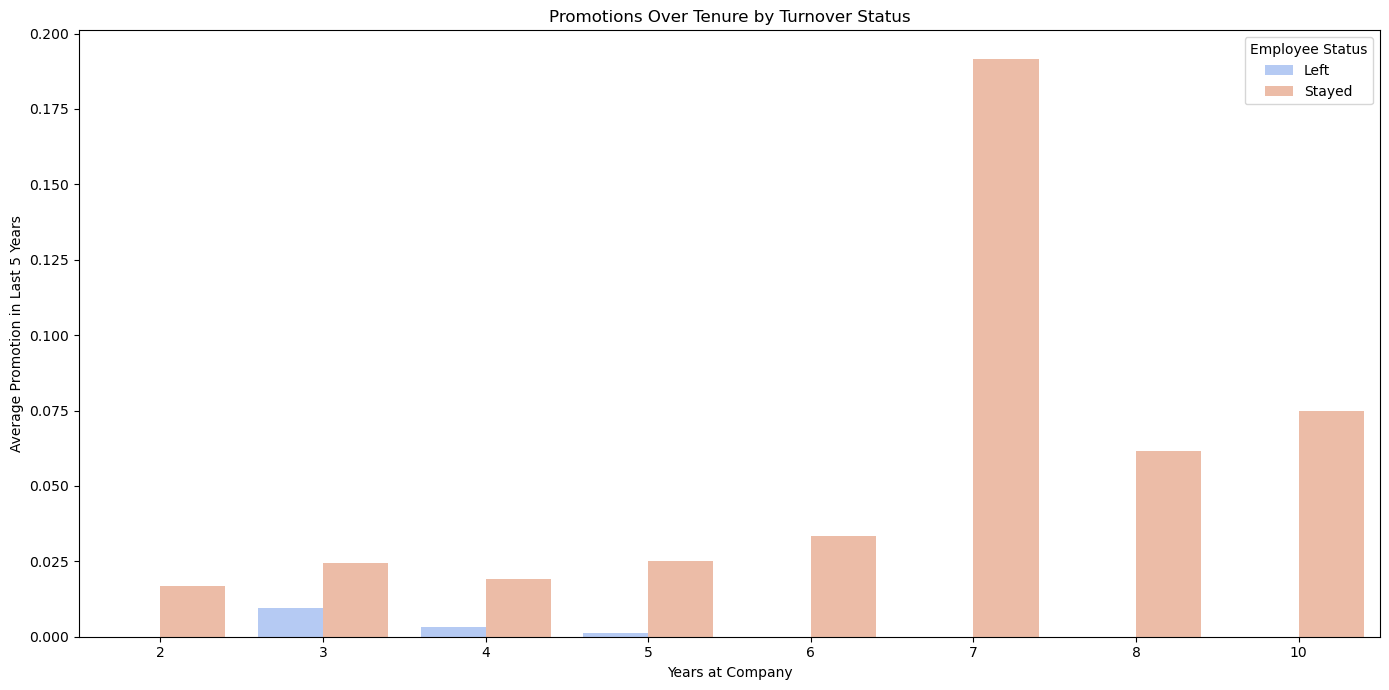

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('HR_capstone_dataset.csv')

# Rename columns for consistency
df.rename(columns={'time_spend_company': 'years_at_company', 'promotion_last_5years': 'promotion_last_5_years'}, inplace=True)

# Create a new column to label employees who left for better visualization
df['left_label'] = df['left'].apply(lambda x: 'Left' if x == 1 else 'Stayed')

# Create a bar chart showing the average number of promotions by tenure and turnover status
plt.figure(figsize=(14, 7))
sns.barplot(data=df, x='years_at_company', y='promotion_last_5_years', hue='left_label', ci=None, palette='coolwarm')

# Customize the chart
plt.title('Promotions Over Tenure by Turnover Status')
plt.xlabel('Years at Company')
plt.ylabel('Average Promotion in Last 5 Years')
plt.legend(title='Employee Status')
plt.tight_layout()
plt.show()


<h1>Summary of Insights, Recommendations, and Future Directions</h1>



<h2>1. **Key Factors Contributing to Turnover:**
   - Low job satisfaction level
   - Low performance evaluation scores
   - High number of projects
   - High average monthly hours
   - Longer tenure at the company
   - Lack of promotion in the last 5 years</h2>



<h2>2. **Recommendations:**
   - Implement initiatives to improve employee satisfaction, such as career development programs, flexible work hours, and recognition programs.
   - Monitor workload to ensure employees are not overburdened with projects and working excessive hours.
   - Provide opportunities for professional growth and promotions to retain employees longer.
   - Conduct regular performance reviews and provide constructive feedback to help employees improve and feel valued.</h2>

<h2>3. **Ethical Considerations:**
   - Ensure the privacy and confidentiality of employee data.
   - Avoid bias in model predictions and ensure fairness in decision-making processes.
   - Transparently communicate findings and recommendations to employees to foster trust and collaboration.</h2>

<h2>4. **Future Work:**
   - Collect additional data points (e.g., employee feedback, exit interviews) to gain deeper insights into the reasons behind turnover.</h2>